In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scipy

In [ ]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7,5) # it sets size for the future plots

In [ ]:
df_heights = pd.read_csv('/content/drive/MyDrive/ml_practice/feature_engineering/zscore_std/heights (1).csv')
df_heights.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [ ]:
df_heights.shape

(10000, 2)

Plotting histogram for data

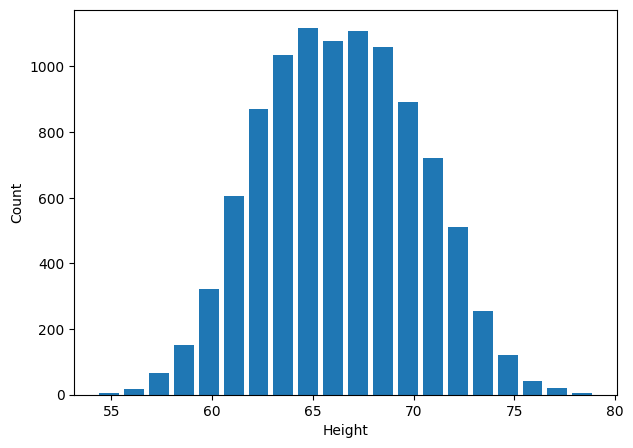

In [ ]:
plt.hist(df_heights.height, bins = 20, rwidth =0.8) # inputs, total no. of bars wanted, width of those bars
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

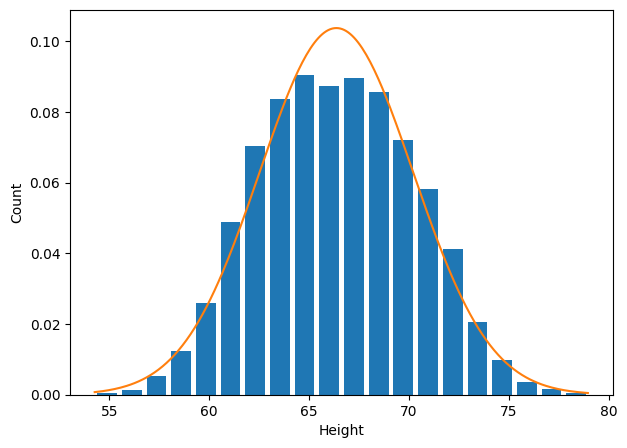

In [ ]:
from scipy.stats import norm

plt.hist(df_heights.height, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('Height')
plt.ylabel('Count')

bell_curve = np.arange(df_heights.height.min(), df_heights.height.max(), 0.1) # step size - determines smooth of curve, small increaments with many points
# normal distribution curve - pdf(Probability Density Function) height of normal distribution for each x - value
plt.plot(bell_curve, norm.pdf(bell_curve, df_heights.height.mean(), df_heights.height.std()))


To determine the outliers we are removing the datapoints that are 3 times far away from mean using standard deviation

In [ ]:
df_heights.height.std()

3.847528120795573

In [ ]:
upper_limit = df_heights.height.mean() + 3 * df_heights.height.std()
upper_limit

np.float64(77.91014411725271)

In [ ]:
lower_limit = df_heights.height.mean() - 3*df_heights.height.std()
lower_limit

np.float64(54.824975392479274)

Viewing all outliers

In [ ]:
df_heights[(df_heights.height < upper_limit) | (df_heights.height > lower_limit)]

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
df2_heights = df_heights[(df_heights.height < upper_limit) & (df_heights.height > lower_limit)]

In [ ]:
df2_heights.shape

(9993, 2)

Z score is just value of standard deviation. z_score = (inputs - mean) / std

In [ ]:
df_heights['z_score'] = (df_heights.height - df_heights.height.mean()) / df_heights.height.std()
df_heights.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [ ]:
df_heights[df_heights['z_score']> 3]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [ ]:
df_heights[df_heights['z_score']< -3]

,gender,height,z_score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [ ]:
df_heights_no_outlier = df_heights[(df_heights['z_score']< 3) &(df_heights['z_score']> -3)]
df_heights_no_outlier.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [ ]:
df_heights_no_outlier.shape

(9993, 3)

## Exercise

In [79]:
df_bhp = pd.read_csv('/content/drive/MyDrive/ml_practice/feature_engineering/zscore_std/bhp (1).csv')
df_bhp.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


Removing outlier using # 1 percentile

In [80]:
min_threshold, max_threshold = df_bhp.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [81]:
df2_bhp = df_bhp[(df_bhp.price_per_sqft > min_threshold) & (df_bhp.price_per_sqft < max_threshold)]
df2_bhp.shape

(13172, 7)

Removing outliers again using # 2 standard deviation

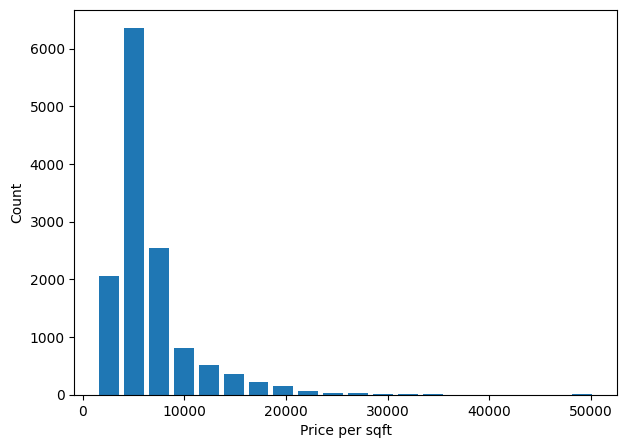

In [82]:
plt.hist(df2_bhp.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()

In [83]:
df2_bhp.price_per_sqft.mean()

np.float64(6663.6537351958705)

In [85]:
df2_bhp.price_per_sqft.std()

4141.020700174605

In [87]:
upper_limit_bhp = df2_bhp.price_per_sqft.mean() + 4*(df2_bhp.price_per_sqft.std())
upper_limit_bhp

np.float64(23227.73653589429)

In [88]:
lower_limit_bhp = df2_bhp.price_per_sqft.mean() - 4*(df2_bhp.price_per_sqft.std())
lower_limit_bhp

np.float64(-9900.429065502549)

In [90]:
df3_bhp = df2_bhp[(df2_bhp.price_per_sqft < upper_limit_bhp) & (df2_bhp.price_per_sqft > lower_limit_bhp)]

In [91]:
df3_bhp.shape

(13047, 7)

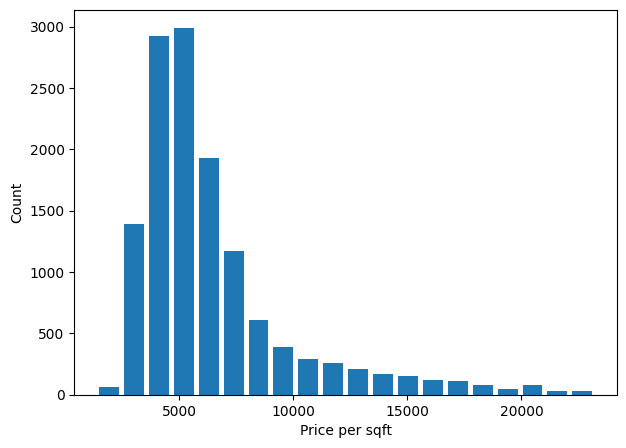

In [92]:
plt.hist(df3_bhp.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()

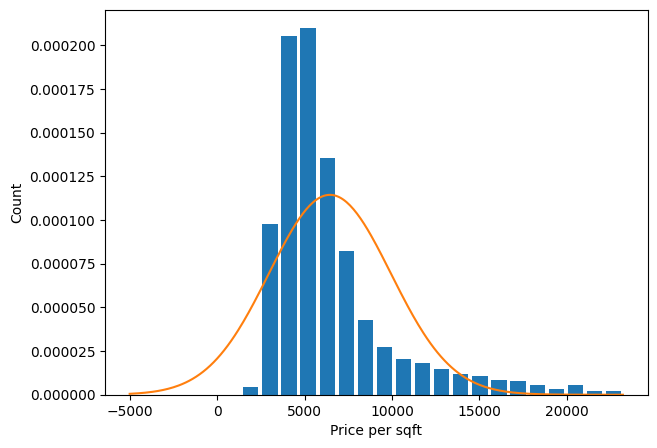

In [94]:
from scipy.stats import norm

plt.hist(df3_bhp.price_per_sqft, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

curve = np.arange(-5000, df3_bhp.price_per_sqft.max(), 100)
plt.plot(curve, norm.pdf(curve, df3_bhp.price_per_sqft.mean(), df3_bhp.price_per_sqft.std()))

Removing outliers using # 3 Z_score

In [95]:
df3_bhp['z_score'] =(df3_bhp.price_per_sqft - df3_bhp.price_per_sqft.mean()) / df3_bhp.price_per_sqft.std()
df3_bhp.head()

/tmp/ipython-input-3237367292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bhp['z_score'] =(df3_bhp.price_per_sqft - df3_bhp.price_per_sqft.mean()) / df3_bhp.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601


In [99]:
no_outliers = df3_bhp[(df3_bhp.z_score < 4) & (df3_bhp.z_score >-4)]
no_outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
12889,Electronic City,3 BHK,1500.0,2.0,70.00,3,4666,-0.511324
7854,other,2 BHK,750.0,2.0,28.00,2,3733,-0.778837
3198,Hosakerehalli,5 Bedroom,2400.0,5.0,250.00,5,10416,1.137342
12380,other,5 Bedroom,1000.0,4.0,80.00,5,8000,0.444615
12749,Channasandra,2 BHK,1050.0,2.0,44.41,2,4229,-0.636622
734,Anekal,2 BHK,656.0,2.0,22.00,2,3353,-0.887793
6683,Kasavanhalli,3 BHK,1719.0,3.0,184.00,3,10703,1.219631
7364,Sonnenahalli,3 BHK,1484.0,3.0,74.18,3,4998,-0.416131
6449,Thanisandra,3 BHK,1411.0,3.0,93.15,3,6601,0.043488
8315,other,2 BHK,826.0,2.0,36.00,2,4358,-0.599635


In [100]:
no_outliers.shape

(12961, 8)

In [101]:
df3_bhp.shape[0] - no_outliers.shape[0]

86